In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(".")  # specify full path if running notebook from outside the folder

## Detection Comparison: YOLOv5 vs best.pt

This section compares two object detection models based on their detection outputs on the same video:

- **task2** → YOLOv5 (default COCO model, trained to detect `person`)
- **original_task2** → A custom-trained `best.pt` model (detects `player`, `referee`, `goalkeeper`, `ball`, etc.)

---

### 1. Total Detections

We compare the **total number of detections** made by each model across all frames, regardless of class label.

This gives us an idea of how actively each model detects objects — whether one is more "liberal" or "conservative" in labeling.

---

### 2. Confidence Score Analysis

Instead of looking at just raw detection counts, we evaluate the **confidence score** of each detection:

- **Average confidence score** — how sure the model typically is
- **Distribution of confidence values** — does it consistently give high-confidence predictions, or does it vary a lot?
- **Confidence per frame** — to track whether one model is more stable or fluctuates more over time

In [36]:
import pandas as pd

# === Load detection CSVs ===
df_task2 = pd.read_csv("task2/output/detection_results.csv")
df_original = pd.read_csv("original_task2/output/detection_results.csv")

# Show a sample
df_task2.head(), df_original.head()

(   frame class_name  confidence    x1   y1    x2   y2
 0      0     person    0.870464   396  421   454  501
 1      0     person    0.869158   794  468   863  566
 2      0     person    0.760257  1086  349  1133  438
 3      0     person    0.753900   149  266   188  347
 4      0     person    0.748825  1134  251  1174  331,
    frame class_name  confidence   x1   y1   x2   y2
 0      0     player    0.924680  794  470  864  566
 1      0     player    0.922993  431  160  467  227
 2      0     player    0.918692  839  187  873  247
 3      0     player    0.917580  392  422  457  500
 4      0     player    0.913436  140  266  190  347)

In [ ]:
detailed_to_generic = {
    "player": "person",
    "referee": "person",
    "goalkeeper": "person",
    "ball": "ball"
}

df_original["normalized_class"] = df_original["class_name"].map(detailed_to_generic).fillna(df_original["class_name"])

df_task2["normalized_class"] = df_task2["class_name"] 

In [ ]:
task2_counts = df_task2[df_task2["normalized_class"] == "person"].groupby("frame").size()
original_counts = df_original[df_original["normalized_class"] == "person"].groupby("frame").size()

all_frames = sorted(set(task2_counts.index).union(original_counts.index))
task2_counts = task2_counts.reindex(all_frames, fill_value=0)
original_counts = original_counts.reindex(all_frames, fill_value=0)

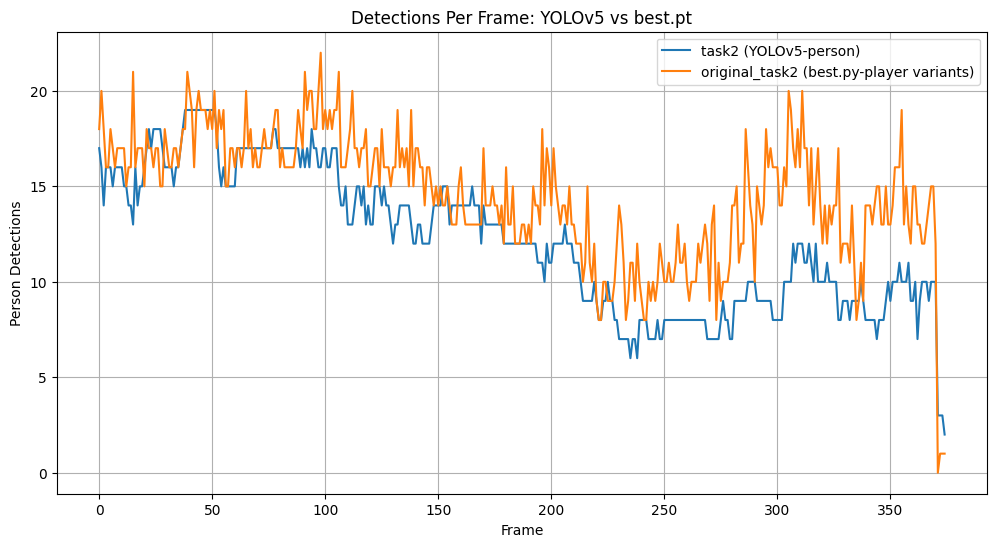

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(task2_counts, label="task2 (YOLOv5-person)")
plt.plot(original_counts, label="original_task2 (best.py-player variants)")
plt.xlabel("Frame")
plt.ylabel("Person Detections")
plt.title("Detections Per Frame: YOLOv5 vs best.pt")
plt.legend()
plt.grid(True)
plt.show()

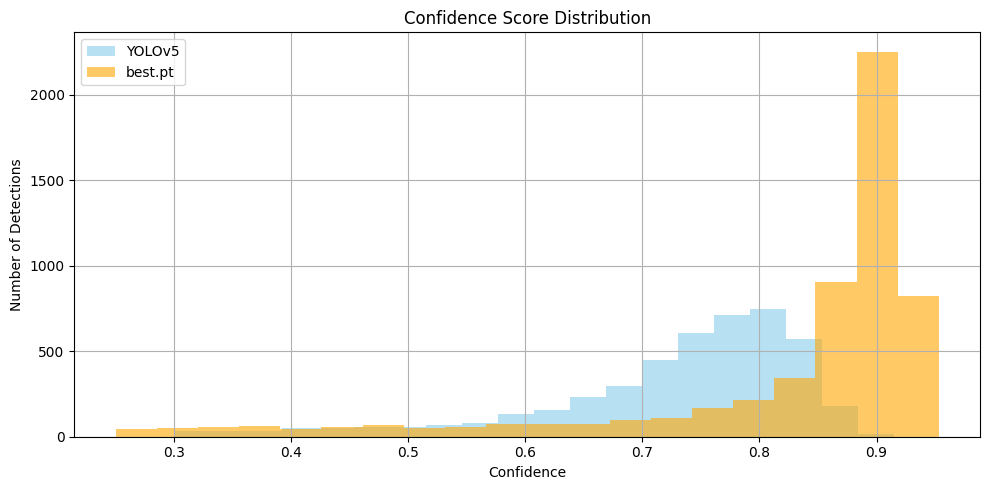

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_task2["confidence"], bins=20, alpha=0.6, label="YOLOv5", color='skyblue')
plt.hist(df_original["confidence"], bins=20, alpha=0.6, label="best.pt", color='orange')
plt.xlabel("Confidence")
plt.ylabel("Number of Detections")
plt.title("Confidence Score Distribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
print("Top 5 Confidences - YOLOv5:\n", df_task2["confidence"].sort_values(ascending=False).head())
print("\nTop 5 Confidences - best.pt:\n", df_original["confidence"].sort_values(ascending=False).head())

Top 5 Confidences - YOLOv5:
 4564    0.914587
2515    0.902903
2707    0.895661
2529    0.894430
2868    0.893755
Name: confidence, dtype: float64

Top 5 Confidences - best.pt:
 3946    0.953192
3934    0.952965
1534    0.951006
1234    0.950839
5076    0.948751
Name: confidence, dtype: float64


In [42]:
avg_conf_task2 = df_task2["confidence"].mean()
avg_conf_original = df_original["confidence"].mean()

print(f"YOLOv5 Avg Confidence: {avg_conf_task2:.4f}")
print(f"best.pt Avg Confidence: {avg_conf_original:.4f}")

YOLOv5 Avg Confidence: 0.7283
best.pt Avg Confidence: 0.8263


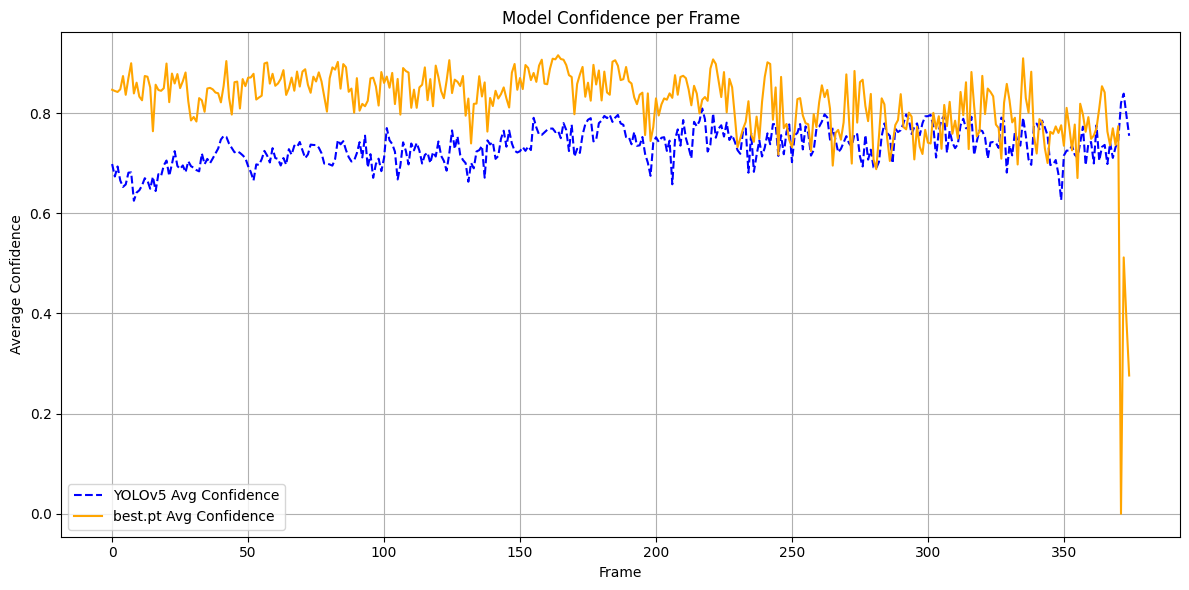

In [44]:
mean_conf_task2 = df_task2.groupby("frame")["confidence"].mean()
mean_conf_original = df_original.groupby("frame")["confidence"].mean()

all_frames = sorted(set(mean_conf_task2.index).union(mean_conf_original.index))
mean_conf_task2 = mean_conf_task2.reindex(all_frames, fill_value=0)
mean_conf_original = mean_conf_original.reindex(all_frames, fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(mean_conf_task2, label="YOLOv5 Avg Confidence", linestyle="--", color="blue")
plt.plot(mean_conf_original, label="best.pt Avg Confidence", color="orange")
plt.xlabel("Frame")
plt.ylabel("Average Confidence")
plt.title("Model Confidence per Frame")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()